In [1]:
# Importing Python packages

from astropy.io import fits
import numpy as np
from matplotlib import pylab as plt
from matplotlib.ticker import FuncFormatter

# Importing DR2 results

In [2]:
# Setting the path to the location of baseline DR2 data
DR2_lya_path = '/global/cfs/cdirs/desi/science/lya/y3/loa'

In [3]:
deltas_DR2 = {
    'ciii': fits.open(f'{DR2_lya_path}/deltas/delta-ciii-2-0/Log/delta_attributes.fits.gz'),
    'lya': fits.open(f'{DR2_lya_path}/deltas/delta-lya-3-0/Log/delta_attributes.fits.gz'),
    'lyb': fits.open(f'{DR2_lya_path}/deltas/delta-lyb-3-0/Log/delta_attributes.fits.gz')
}

correlation_functions_DR2 = {
    'lyalya': fits.open(f'{DR2_lya_path}/correlations/correlation-lyalya-3-0-0/cf_lya_x_lya_exp.fits'),
    'lyalyb': fits.open(f'{DR2_lya_path}/correlations/correlation-lyalyb-3-0-0/cf_lya_x_lyb_exp.fits'),
    'qsolya': fits.open(f'{DR2_lya_path}/correlations/correlation-qsolya-3-0-0/cf_qso_x_lya_exp.fits'),
    'qsolyb': fits.open(f'{DR2_lya_path}/correlations/correlation-qsolyb-3-0-0/cf_qso_x_lyb_exp.fits')
}

# Importing Re-gunning results

In [4]:
# Setting the path to the folder in your user where the re-do is located
redo_path = '/pscratch/sd/r/rafaelgb/redoDR2-Lya'

In [5]:
deltas_redo = {
    'ciii': fits.open(f'{redo_path}/deltas/delta-ciii-2-0/Log/delta_attributes.fits.gz'),
    'lya': fits.open(f'{redo_path}/deltas/delta-lya-3-0/Log/delta_attributes.fits.gz'),
    'lyb': fits.open(f'{redo_path}/deltas/delta-lyb-3-0/Log/delta_attributes.fits.gz')
}

correlation_functions_redo = {
    'lyalya': fits.open(f'{redo_path}/correlations/correlation-lyalya-3-0-0/cf_lya_x_lya_exp.fits'),
    'lyalyb': fits.open(f'{redo_path}/correlations/correlation-lyalyb-3-0-0/cf_lya_x_lyb_exp.fits'),
    'qsolya': fits.open(f'{redo_path}/correlations/correlation-qsolya-3-0-0/cf_qso_x_lya_exp.fits'),
    'qsolyb': fits.open(f'{redo_path}/correlations/correlation-qsolyb-3-0-0/cf_qso_x_lyb_exp.fits')
}

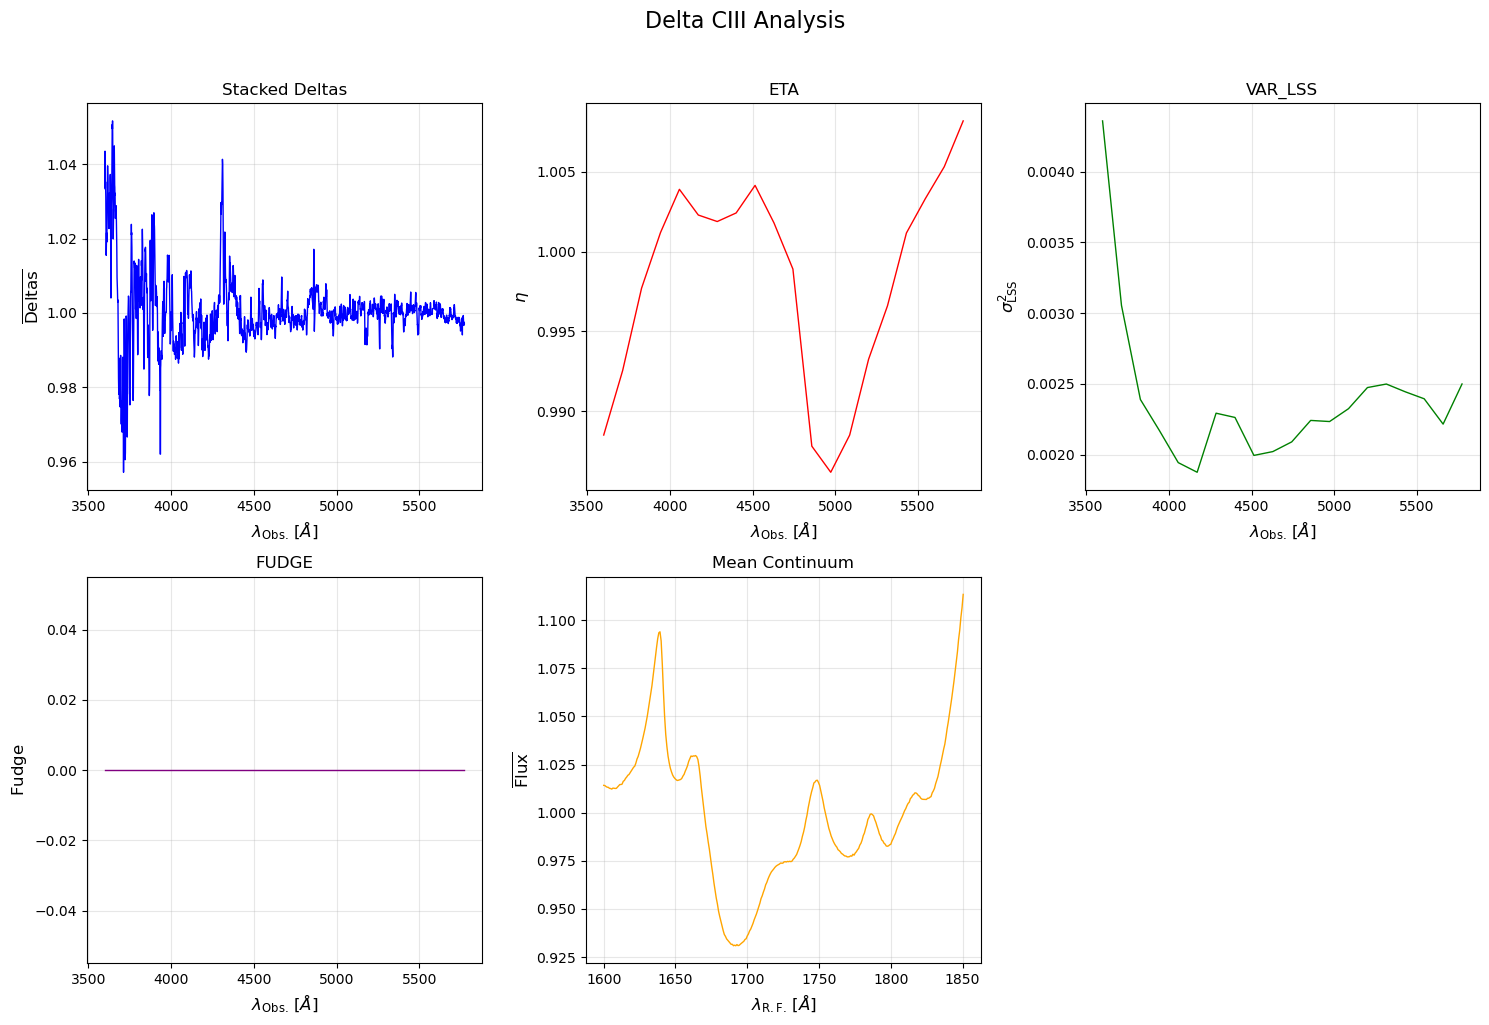

=== Delta CIII Summary ===
Stacked Deltas range: 0.957 to 1.052
ETA range: 0.986 to 1.008
VAR_LSS range: 0.002 to 0.004
FUDGE range: 0.000e+00 to 0.000e+00
Mean Continuum range: 0.931 to 1.113



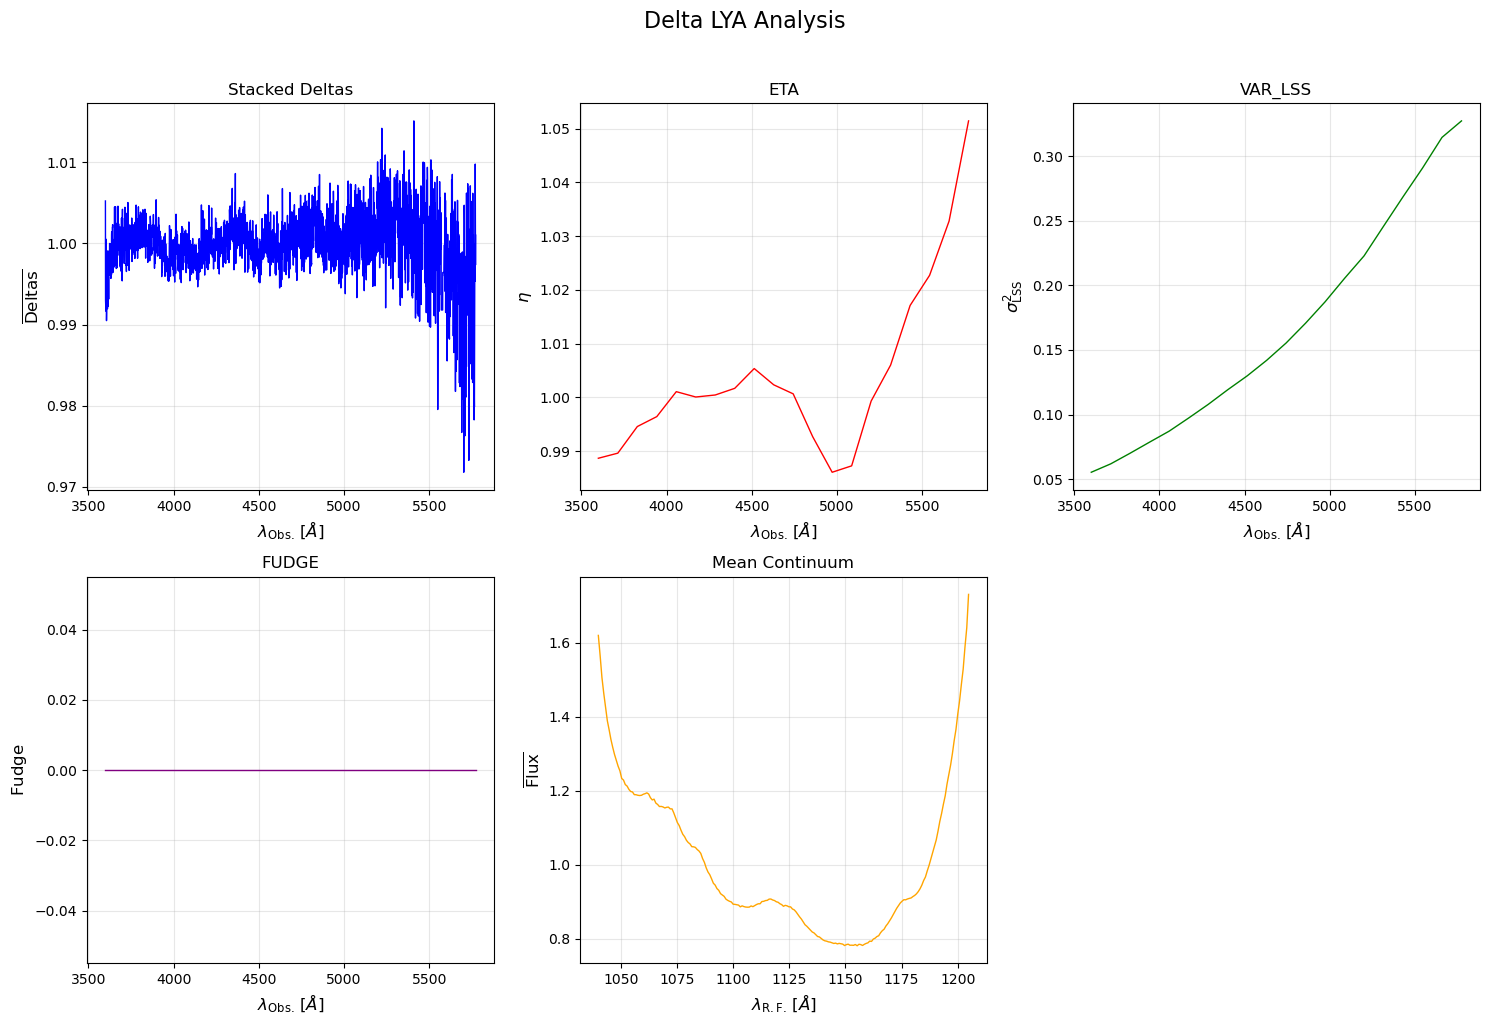

=== Delta LYA Summary ===
Stacked Deltas range: 0.972 to 1.015
ETA range: 0.986 to 1.051
VAR_LSS range: 0.055 to 0.327
FUDGE range: 0.000e+00 to 0.000e+00
Mean Continuum range: 0.782 to 1.731



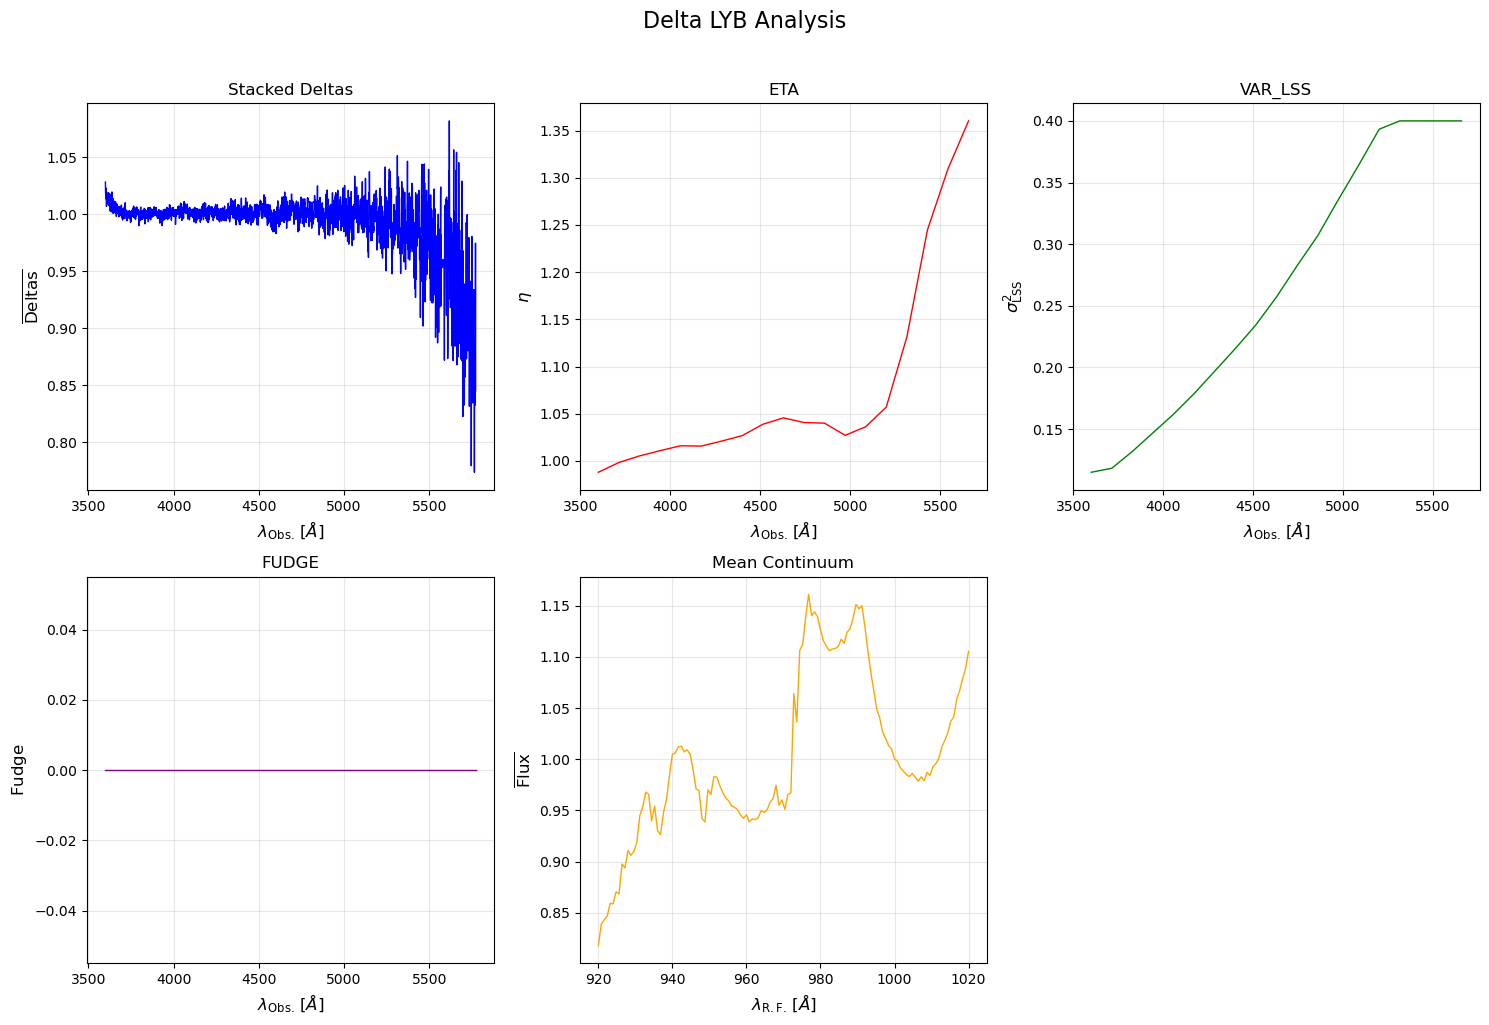

=== Delta LYB Summary ===
Stacked Deltas range: 0.773 to 1.082
ETA range: 0.988 to 1.360
VAR_LSS range: 0.115 to 0.400
FUDGE range: 0.000e+00 to 0.000e+00
Mean Continuum range: 0.818 to 1.161



In [7]:
# Creating subplots for each type of Re-do delta
for name, hdul in deltas_redo.items():
    # Create the same subplot structure for each delta
    f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axs[-1, -1].axis('off')
    
    # Set the main title for the entire figure
    f.suptitle(f'Delta {name.upper()} Analysis', fontsize=16, y=1.02)

    ### Stack Delta Plot
    loglam = hdul['STACK_DELTAS'].data['LOGLAM'][:]
    stack  = hdul['STACK_DELTAS'].data['STACK'][:]
    cut = (stack != 0.) & (hdul['STACK_DELTAS'].data['WEIGHT'][:] > 0.)
    loglam = loglam[cut]
    stack  = stack[cut]
    axs[0][0].plot(10.**loglam, stack, linewidth=1, color='blue')
    axs[0][0].grid(alpha=0.3)
    axs[0][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[0][0].set_ylabel(r'$\mathrm{\overline{Deltas}}$', fontsize=12)
    axs[0][0].set_title('Stacked Deltas')

    ### ETA Plot
    loglam    = hdul['VAR_FUNC'].data['LOGLAM'][:]
    eta       = hdul['VAR_FUNC'].data['ETA'][:]
    nb_pixels = hdul['VAR_FUNC'].data['NUM_PIXELS'][:]
    cut = (nb_pixels > 0.) & (eta != 1.)
    loglam = loglam[cut]
    eta    = eta[cut]
    axs[0][1].plot(10.**loglam, eta, linewidth=1, color='red')
    axs[0][1].grid(alpha=0.3)
    axs[0][1].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[0][1].set_ylabel(r'$\eta$', fontsize=12)
    axs[0][1].set_title('ETA')

    ### VAR_LSS Plot
    loglam    = hdul['VAR_FUNC'].data['LOGLAM'][:]
    var_lss   = hdul['VAR_FUNC'].data['VAR_LSS'][:]
    nb_pixels = hdul['VAR_FUNC'].data['NUM_PIXELS'][:]
    cut       = (nb_pixels > 0.) & (var_lss != 0.1)
    loglam    = loglam[cut]
    var_lss   = var_lss[cut]
    axs[0][2].plot(10.**loglam, var_lss, linewidth=1, color='green')
    axs[0][2].grid(alpha=0.3)
    axs[0][2].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[0][2].set_ylabel(r'$\sigma^{2}_{\mathrm{LSS}}$', fontsize=12)
    axs[0][2].set_title('VAR_LSS')

    ### FUDGE Plot
    loglam    = hdul['VAR_FUNC'].data['LOGLAM'][:]
    fudge     = hdul['VAR_FUNC'].data['FUDGE'][:]
    nb_pixels = hdul['VAR_FUNC'].data['NUM_PIXELS'][:]
    cut       = (nb_pixels > 0.) & (fudge != 1.e-7)
    loglam    = loglam[cut]
    fudge     = fudge[cut]
    axs[1][0].plot(10.**loglam, fudge, linewidth=1, color='purple')
    axs[1][0].grid(alpha=0.3)
    axs[1][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[1][0].set_ylabel(r'$\mathrm{Fudge}$', fontsize=12)
    axs[1][0].set_title('FUDGE')

    ### Mean Continuum Plot
    loglam_rest = hdul['CONT'].data['LOGLAM_REST'][:]
    mean_cont   = hdul['CONT'].data['MEAN_CONT'][:]
    cut = (mean_cont != 0.) & (hdul['CONT'].data['WEIGHT'][:] > 0.)
    loglam_rest = loglam_rest[cut]
    mean_cont   = mean_cont[cut]
    axs[1][1].plot(10.**loglam_rest, mean_cont, linewidth=1, color='orange')
    axs[1][1].grid(alpha=0.3)
    axs[1][1].set_xlabel(r'$\lambda_{\mathrm{R.F.}} \, [\AA]$', fontsize=12)
    axs[1][1].set_ylabel(r'$\mathrm{\overline{Flux}}$', fontsize=12)
    axs[1][1].set_title('Mean Continuum')

    plt.tight_layout()
    plt.show()
    
    # Print some info about each delta
    print(f"=== Delta {name.upper()} Summary ===")
    print(f"Stacked Deltas range: {np.min(stack):.3f} to {np.max(stack):.3f}")
    print(f"ETA range: {np.min(eta):.3f} to {np.max(eta):.3f}")
    print(f"VAR_LSS range: {np.min(var_lss):.3f} to {np.max(var_lss):.3f}")
    print(f"FUDGE range: {np.min(fudge):.3e} to {np.max(fudge):.3e}")
    print(f"Mean Continuum range: {np.min(mean_cont):.3f} to {np.max(mean_cont):.3f}")
    print()

## Comparison with DR2 Ly$\alpha$ results

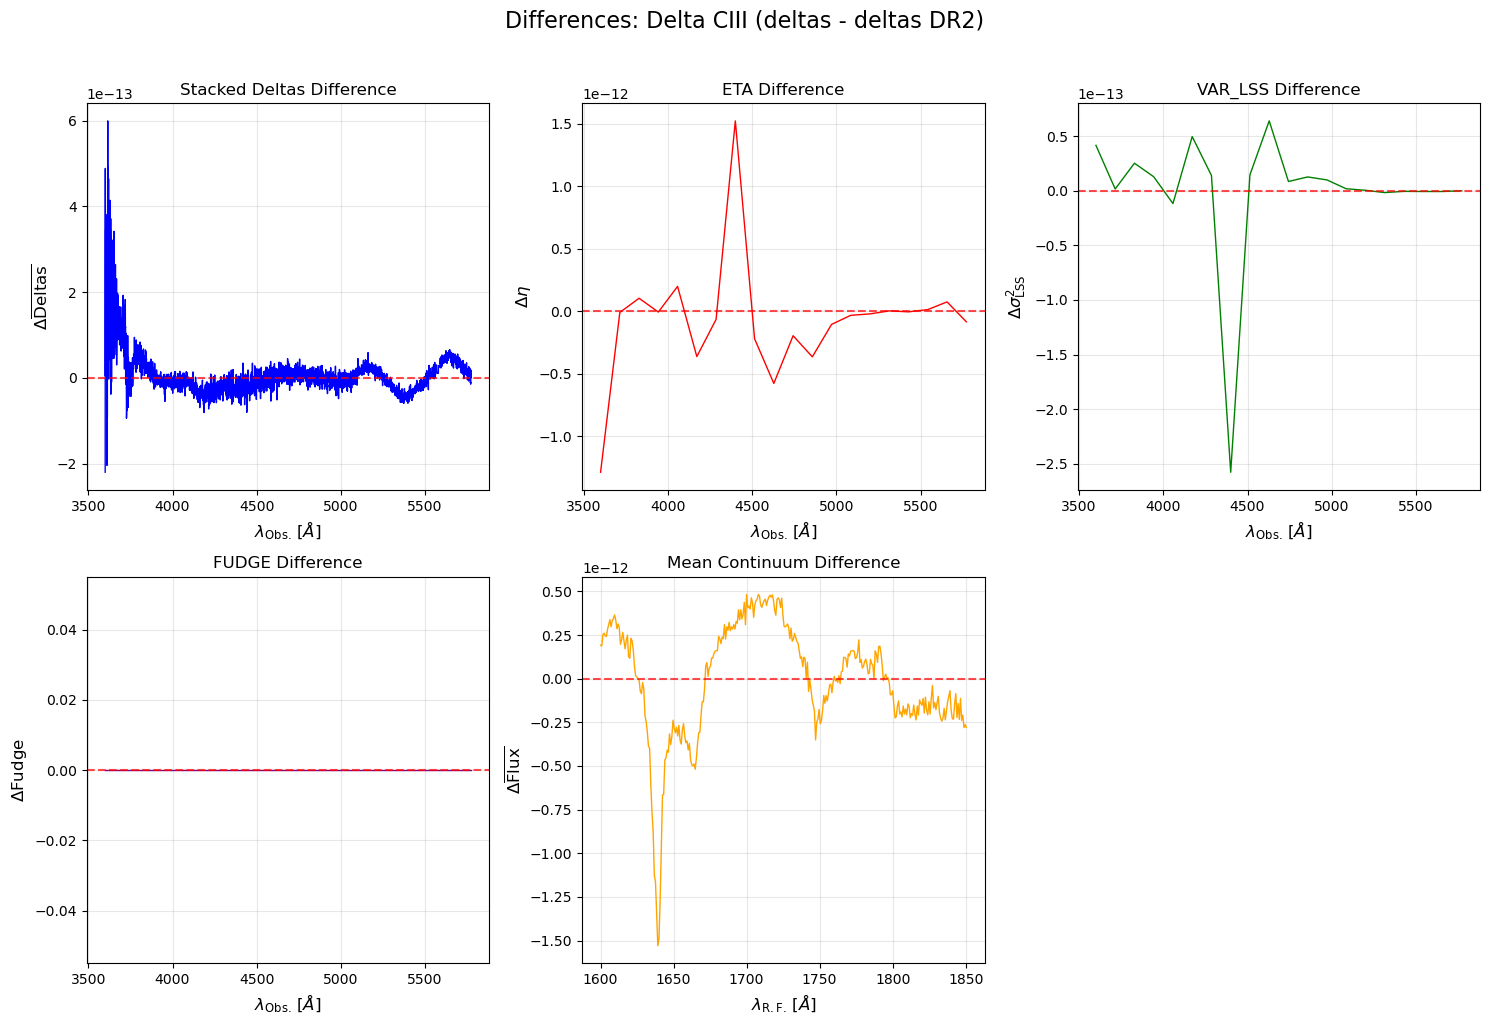

=== Delta CIII Difference Statistics ===
Stacked Deltas diff - Mean: -9.023e-15, Std: 3.288e-13


<Figure size 640x480 with 0 Axes>

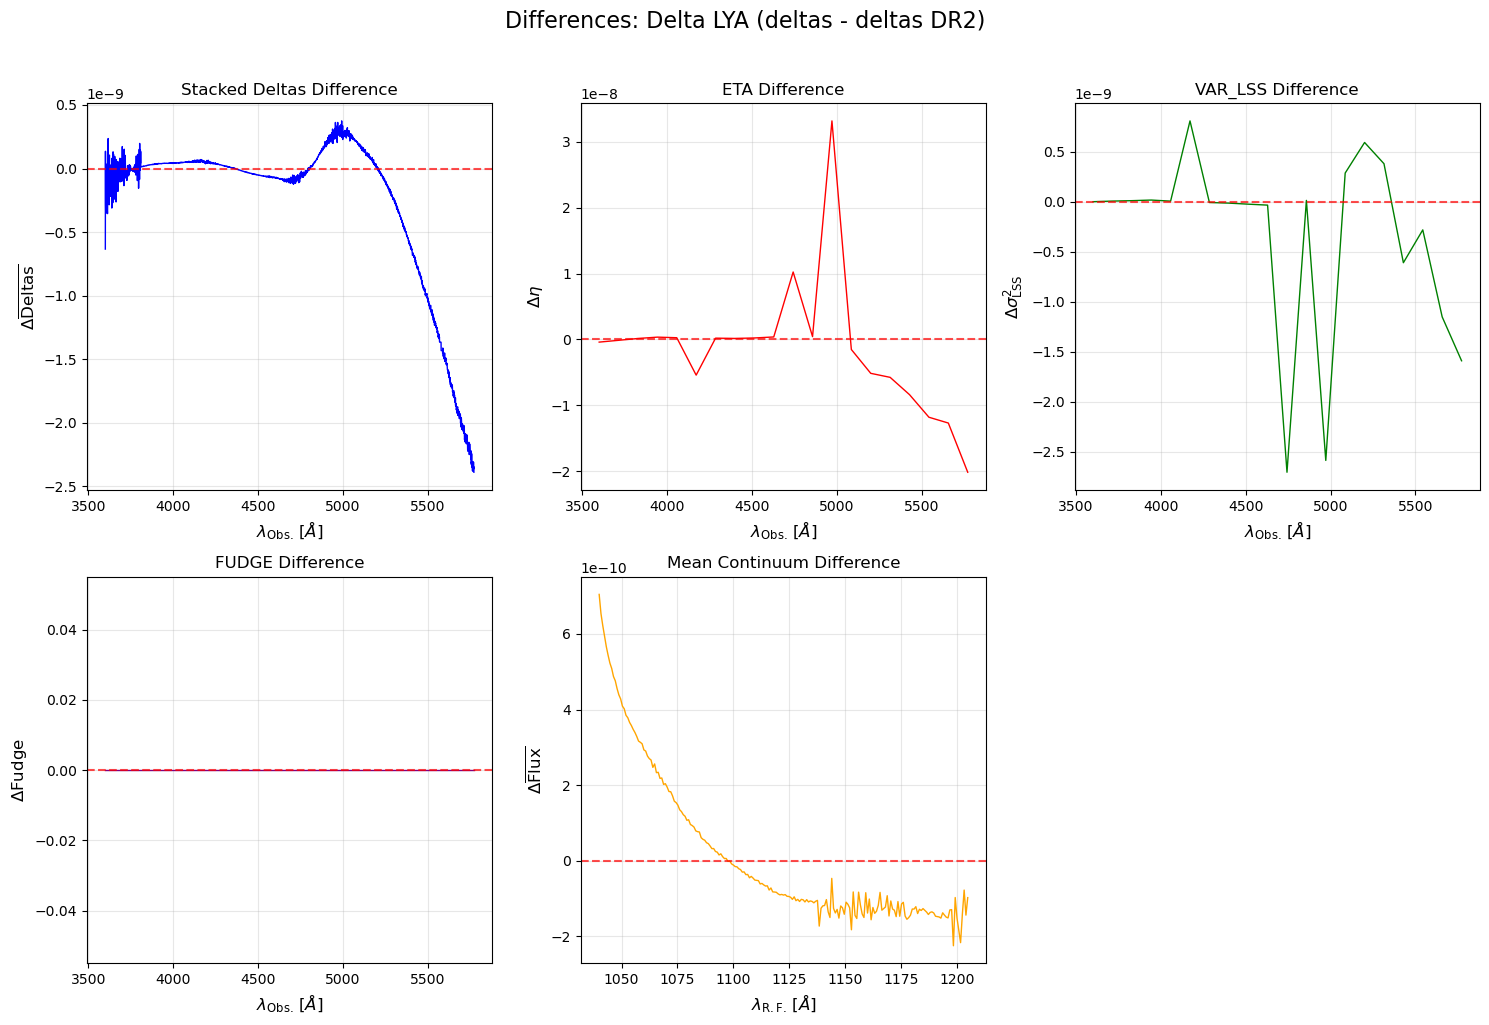

=== Delta LYA Difference Statistics ===
Stacked Deltas diff - Mean: 1.343e-11, Std: 2.005e-10


<Figure size 640x480 with 0 Axes>

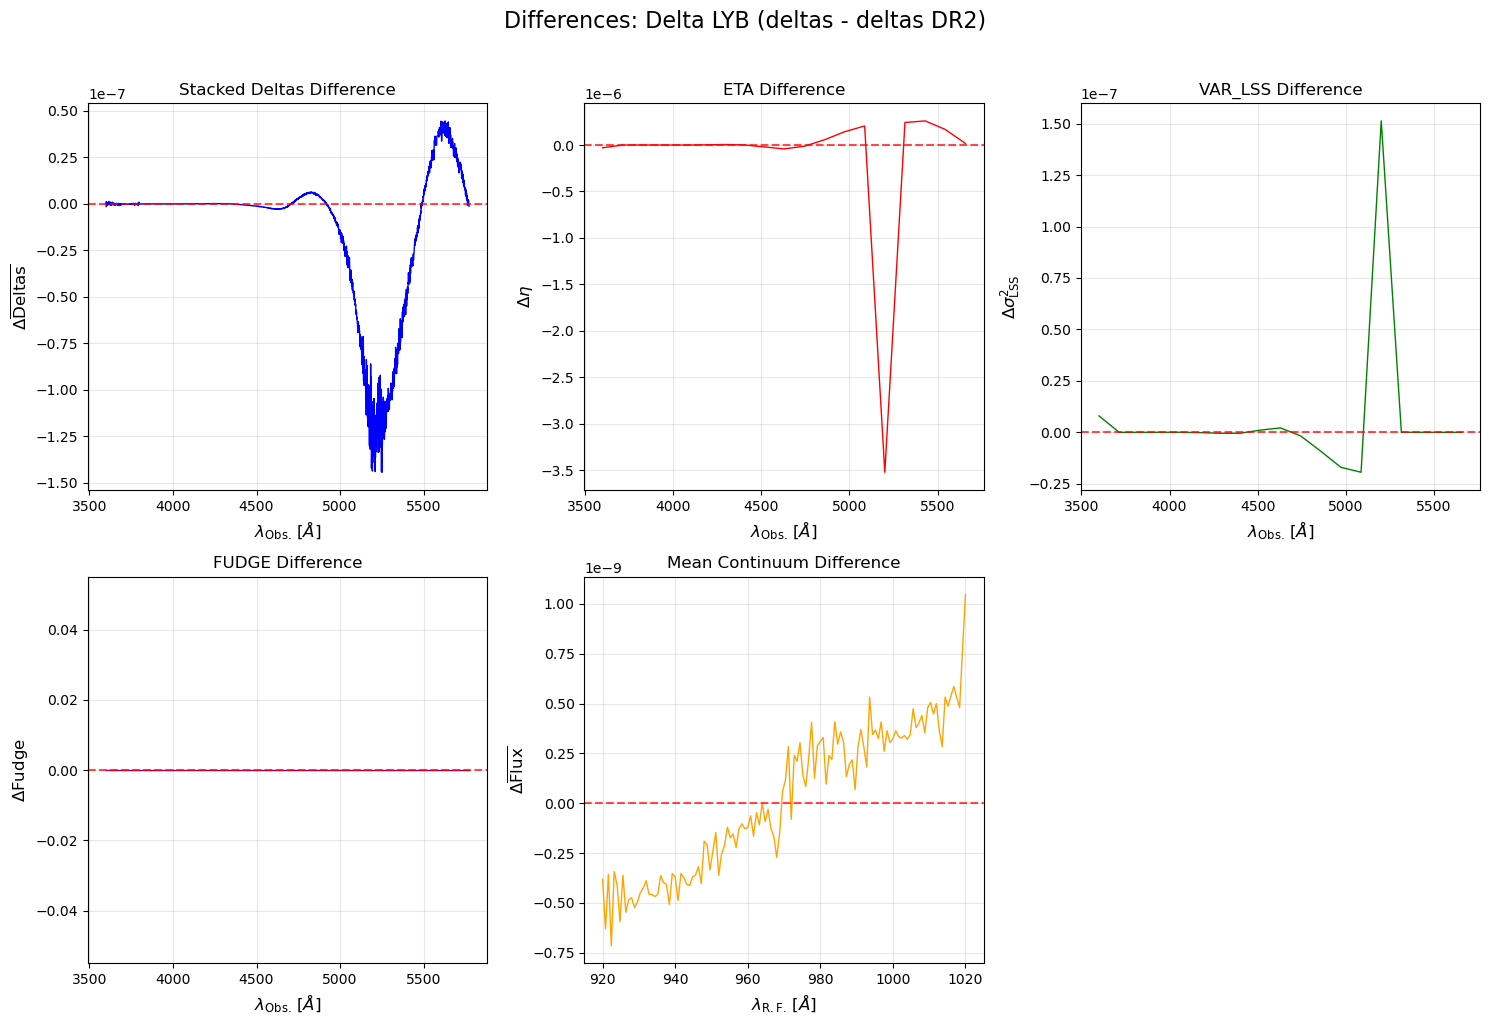

=== Delta LYB Difference Statistics ===
Stacked Deltas diff - Mean: 1.522e-11, Std: 3.668e-10


<Figure size 640x480 with 0 Axes>

In [6]:
# Plot differences between deltas and deltasDR2 for all three types
for name in deltas_redo.keys():
    if name in deltas_DR2:  # Ensure the same delta exists in both dictionaries
        # Create the same subplot structure for differences
        f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
        axs[-1, -1].axis('off')
        
        # Set the main title for the entire figure
        f.suptitle(f'Differences: Delta {name.upper()} (deltas - deltas DR2)', fontsize=16, y=1.02)

        # Get both HDU lists
        hdul_orig = deltas_redo[name]
        hdul_DR2 = deltas_DR2[name]

        ### Stack Delta Difference Plot
        loglam_orig = hdul_orig['STACK_DELTAS'].data['LOGLAM'][:]
        stack_orig = hdul_orig['STACK_DELTAS'].data['STACK'][:]
        cut_orig = (stack_orig != 0.) & (hdul_orig['STACK_DELTAS'].data['WEIGHT'][:] > 0.)
        
        loglam_DR2 = hdul_DR2['STACK_DELTAS'].data['LOGLAM'][:]
        stack_DR2 = hdul_DR2['STACK_DELTAS'].data['STACK'][:]
        cut_DR2 = (stack_DR2 != 0.) & (hdul_DR2['STACK_DELTAS'].data['WEIGHT'][:] > 0.)
        
        # Find common wavelength range
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_DR2[cut_DR2])
        
        if len(common_loglam) > 0:
            # Get values at common wavelengths
            orig_vals = stack_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            DR2_vals = stack_DR2[cut_DR2][np.isin(loglam_DR2[cut_DR2], common_loglam)]
            difference = orig_vals - DR2_vals
            
            axs[0][0].plot(10.**common_loglam, difference, linewidth=1, color='blue')
            axs[0][0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[0][0].grid(alpha=0.3)
            axs[0][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[0][0].set_ylabel(r'$\Delta \mathrm{\overline{Deltas}}$', fontsize=12)
            axs[0][0].set_title('Stacked Deltas Difference')

        ### ETA Difference Plot
        loglam_orig = hdul_orig['VAR_FUNC'].data['LOGLAM'][:]
        eta_orig = hdul_orig['VAR_FUNC'].data['ETA'][:]
        nb_pixels_orig = hdul_orig['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_orig = (nb_pixels_orig > 0.) & (eta_orig != 1.)
        
        loglam_DR2 = hdul_DR2['VAR_FUNC'].data['LOGLAM'][:]
        eta_DR2 = hdul_DR2['VAR_FUNC'].data['ETA'][:]
        nb_pixels_DR2 = hdul_DR2['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_DR2 = (nb_pixels_DR2 > 0.) & (eta_DR2 != 1.)
        
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_DR2[cut_DR2])
        
        if len(common_loglam) > 0:
            orig_vals = eta_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            DR2_vals = eta_DR2[cut_DR2][np.isin(loglam_DR2[cut_DR2], common_loglam)]
            difference = orig_vals - DR2_vals
            
            axs[0][1].plot(10.**common_loglam, difference, linewidth=1, color='red')
            axs[0][1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[0][1].grid(alpha=0.3)
            axs[0][1].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[0][1].set_ylabel(r'$\Delta \eta$', fontsize=12)
            axs[0][1].set_title('ETA Difference')

        ### VAR_LSS Difference Plot
        loglam_orig = hdul_orig['VAR_FUNC'].data['LOGLAM'][:]
        var_lss_orig = hdul_orig['VAR_FUNC'].data['VAR_LSS'][:]
        nb_pixels_orig = hdul_orig['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_orig = (nb_pixels_orig > 0.) & (var_lss_orig != 0.1)
        
        loglam_DR2 = hdul_DR2['VAR_FUNC'].data['LOGLAM'][:]
        var_lss_DR2 = hdul_DR2['VAR_FUNC'].data['VAR_LSS'][:]
        nb_pixels_DR2 = hdul_DR2['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_DR2 = (nb_pixels_DR2 > 0.) & (var_lss_DR2 != 0.1)
        
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_DR2[cut_DR2])
        
        if len(common_loglam) > 0:
            orig_vals = var_lss_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            DR2_vals = var_lss_DR2[cut_DR2][np.isin(loglam_DR2[cut_DR2], common_loglam)]
            difference = orig_vals - DR2_vals
            
            axs[0][2].plot(10.**common_loglam, difference, linewidth=1, color='green')
            axs[0][2].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[0][2].grid(alpha=0.3)
            axs[0][2].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[0][2].set_ylabel(r'$\Delta \sigma^{2}_{\mathrm{LSS}}$', fontsize=12)
            axs[0][2].set_title('VAR_LSS Difference')

        ### FUDGE Difference Plot
        loglam_orig = hdul_orig['VAR_FUNC'].data['LOGLAM'][:]
        fudge_orig = hdul_orig['VAR_FUNC'].data['FUDGE'][:]
        nb_pixels_orig = hdul_orig['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_orig = (nb_pixels_orig > 0.) & (fudge_orig != 1.e-7)
        
        loglam_DR2 = hdul_DR2['VAR_FUNC'].data['LOGLAM'][:]
        fudge_DR2 = hdul_DR2['VAR_FUNC'].data['FUDGE'][:]
        nb_pixels_DR2 = hdul_DR2['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_DR2 = (nb_pixels_DR2 > 0.) & (fudge_DR2 != 1.e-7)
        
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_DR2[cut_DR2])
        
        if len(common_loglam) > 0:
            orig_vals = fudge_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            DR2_vals = fudge_DR2[cut_DR2][np.isin(loglam_DR2[cut_DR2], common_loglam)]
            difference = orig_vals - DR2_vals
            
            axs[1][0].plot(10.**common_loglam, difference, linewidth=1, color='purple')
            axs[1][0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[1][0].grid(alpha=0.3)
            axs[1][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[1][0].set_ylabel(r'$\Delta \mathrm{Fudge}$', fontsize=12)
            axs[1][0].set_title('FUDGE Difference')

        ### Mean Continuum Difference Plot
        loglam_rest_orig = hdul_orig['CONT'].data['LOGLAM_REST'][:]
        mean_cont_orig = hdul_orig['CONT'].data['MEAN_CONT'][:]
        cut_orig = (mean_cont_orig != 0.) & (hdul_orig['CONT'].data['WEIGHT'][:] > 0.)
        
        loglam_rest_DR2 = hdul_DR2['CONT'].data['LOGLAM_REST'][:]
        mean_cont_DR2 = hdul_DR2['CONT'].data['MEAN_CONT'][:]
        cut_DR2 = (mean_cont_DR2 != 0.) & (hdul_DR2['CONT'].data['WEIGHT'][:] > 0.)
        
        common_loglam_rest = np.intersect1d(loglam_rest_orig[cut_orig], loglam_rest_DR2[cut_DR2])
        
        if len(common_loglam_rest) > 0:
            orig_vals = mean_cont_orig[cut_orig][np.isin(loglam_rest_orig[cut_orig], common_loglam_rest)]
            DR2_vals = mean_cont_DR2[cut_DR2][np.isin(loglam_rest_DR2[cut_DR2], common_loglam_rest)]
            difference = orig_vals - DR2_vals
            
            axs[1][1].plot(10.**common_loglam_rest, difference, linewidth=1, color='orange')
            axs[1][1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[1][1].grid(alpha=0.3)
            axs[1][1].set_xlabel(r'$\lambda_{\mathrm{R.F.}} \, [\AA]$', fontsize=12)
            axs[1][1].set_ylabel(r'$\Delta \mathrm{\overline{Flux}}$', fontsize=12)
            axs[1][1].set_title('Mean Continuum Difference')

        plt.tight_layout()
        plt.savefig(f'delta-{name}-3-0.png')
        plt.show()
        
        # Print statistics about the differences
        print(f"=== Delta {name.upper()} Difference Statistics ===")
        if len(common_loglam) > 0:
            print(f"Stacked Deltas diff - Mean: {np.mean(difference):.3e}, Std: {np.std(difference):.3e}")
        plt.tight_layout()
        plt.show()

# Re-do and DR2 Correlation Functions

In [6]:
# Generating dictionaries to store the data that we will use to plot the Re-do correlations in (RP,RT) space

correlation_data_redo = {}
grid_coordinates_redo = {}

# Processing all correlation functions from dictionary 'correlation_functions_redo'
for name, hdul in correlation_functions_redo.items():
    print(f"Processing {name}...")
    
    # Extracting correlation data, RP coordinate and RT coordinate with respect to line-of-sight (LOS)
    corr_data = hdul['COR'].data['DA']
    rp_data = hdul['COR'].data['RP']
    rt_data = hdul['COR'].data['RT']
    
    # Determine grid size automatically
    # For correlations with QSOs, we use fixed dimensions (100,50). 
    # For correlations without QSOs, we obtain the dimensions automatically (50,50).
    if name.startswith('qso'):
        n_parallel = 100
        n_transverse = 50
        print(f" Using grid dimensions: ({n_parallel}, {n_transverse})")
    else:
        n_parallel = int(np.sqrt(corr_data.size))
        n_transverse = n_parallel
        print(f" Using grid dimensions: ({n_parallel}, {n_transverse})")
    
    # Reshape the correlation data and their coordinates data
    correlation_reshaped = corr_data.reshape(n_parallel, n_transverse)
    rp_reshaped = rp_data.reshape(n_parallel, n_transverse)
    rt_reshaped = rt_data.reshape(n_parallel, n_transverse)
    
    # Storing in empty dictionaries
    correlation_data_redo[name] = {
        'correlation': correlation_reshaped,
        'original_data': corr_data
    }
    
    grid_coordinates_redo[name] = {
        'rp': rp_reshaped,
        'rt': rt_reshaped,
        'original_rp': rp_data,
        'original_rt': rt_data
    }

print("All Re-do correlations were processed and stored in dictionaries")

Processing lyalya...
 Using grid dimensions: (50, 50)
Processing lyalyb...
 Using grid dimensions: (50, 50)
Processing qsolya...
 Using grid dimensions: (100, 50)
Processing qsolyb...
 Using grid dimensions: (100, 50)
All Re-do correlations were processed and stored in dictionaries


In [7]:
# Generating dictionaries to store the data that we will use to plot the DR2 correlations in (RP,RT) space

correlation_data_DR2 = {}
grid_coordinates_DR2 = {}

# Processing all correlation functions from dictionary 'correlation_functions_DR2'
for name, hdul in correlation_functions_DR2.items():
    print(f"Processing DR2 {name}...")

    # Extracting correlation data, RP coordinate and RT coordinate with respect to line-of-sight (LOS)
    corr_data = hdul['COR'].data['DA']
    rp_data = hdul['COR'].data['RP']
    rt_data = hdul['COR'].data['RT']
    
    # Determine grid size automatically
    # For correlations with QSOs, we use fixed dimensions (100, 50). 
    # For correlations without QSOs, we obtain the dimensions automatically (50,50).
    if name.startswith('qso'):
        n_parallel = 100
        n_transverse = 50
        print(f" Using grid dimensions: ({n_parallel}, {n_transverse})")
    else:
        n_parallel = int(np.sqrt(corr_data.size))
        n_transverse = n_parallel
        print(f" Using automatic grid dimensions: ({n_parallel}, {n_transverse})")
    
    # Reshape the correlation data and their coordinates data
    correlation_reshaped = corr_data.reshape(n_parallel, n_transverse)
    rp_reshaped = rp_data.reshape(n_parallel, n_transverse)
    rt_reshaped = rt_data.reshape(n_parallel, n_transverse)
    
    # Storing in DR2 empty dictionaries
    correlation_data_DR2[name] = {
        'correlation': correlation_reshaped,
        'original_data': corr_data
    }
    
    grid_coordinates_DR2[name] = {
        'rp': rp_reshaped,
        'rt': rt_reshaped,
        'original_rp': rp_data,
        'original_rt': rt_data
    }

print("All DR2 correlations data were processed and stored in dictionaries")

Processing DR2 lyalya...
 Using automatic grid dimensions: (50, 50)
Processing DR2 lyalyb...
 Using automatic grid dimensions: (50, 50)
Processing DR2 qsolya...
 Using grid dimensions: (100, 50)
Processing DR2 qsolyb...
 Using grid dimensions: (100, 50)
All DR2 correlations data were processed and stored in dictionaries


## Plotting Re-do correlation functions in ($r_{\parallel}$, $r_{\perp}$) space

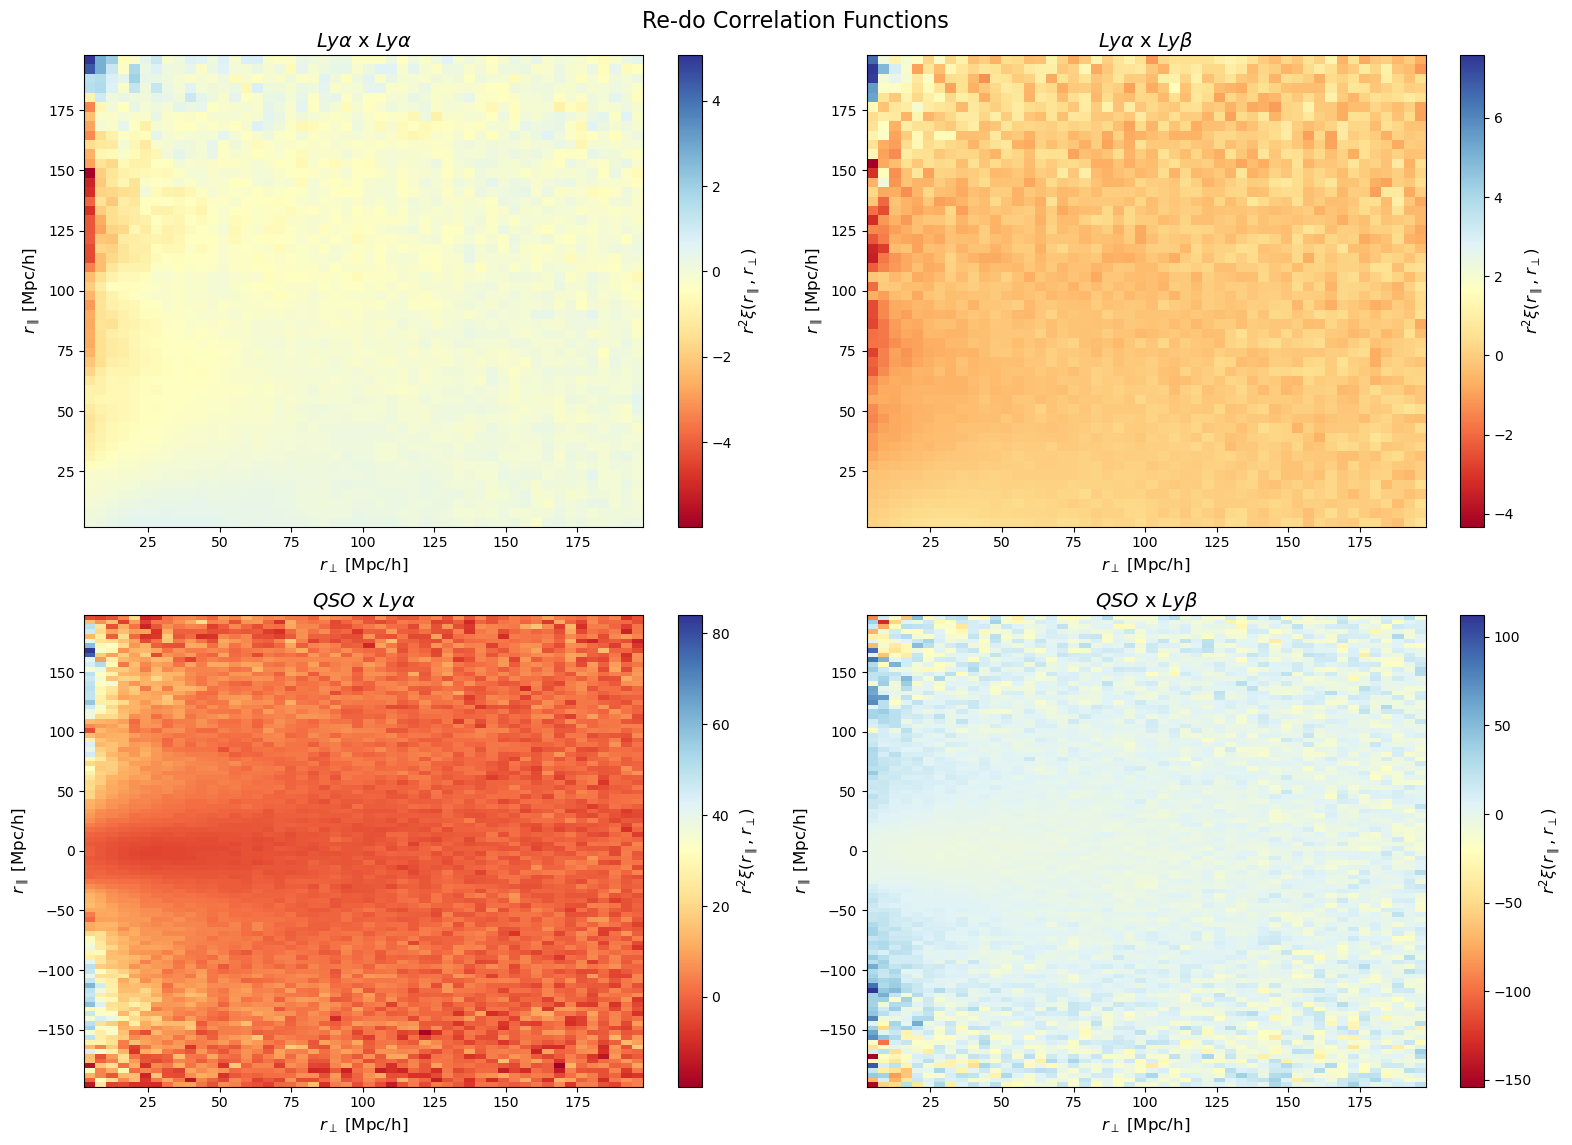

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Re-do Correlation Functions\n', fontsize=16, y=0.95)

correlation_names = ['lyalya', 'lyalyb', 'qsolya', 'qsolyb']

for idx, name in enumerate(correlation_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Getting data from dictionaries
    corr = correlation_data_redo[name]['correlation']
    rp = grid_coordinates_redo[name]['rp']
    rt = grid_coordinates_redo[name]['rt']

    # Calculating the value of the correlation bins to plot
    plot_data = (rt**2 + rp**2) * corr
    
    # Use imshow with extent instead
    extent = [rt.min(), rt.max(), rp.min(), rp.max()]
    mesh = ax.imshow(plot_data, extent=extent, cmap='RdYlBu', 
                    aspect='auto', origin='lower')
    
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(r'$r^2\xi$($r_{\parallel}$, $r_{\perp}$)', fontsize=12)
    
    ax.set_xlabel('$r_{\perp}$ [Mpc/h]', fontsize=12)
    ax.set_ylabel('$r_{\parallel}$ [Mpc/h]', fontsize=12)
    
    titles = {
        'lyalya': r'$Ly\alpha$ x $Ly\alpha$',
        'lyalyb': r'$Ly\alpha$ x $Ly\beta$', 
        'qsolya': r'$QSO$ x $Ly\alpha$',
        'qsolyb': r'$QSO$ x $Ly\beta$'
    }
    ax.set_title(titles[name], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig(f'correlations-3-0-0.png')
plt.show()

## Comparison with DR2 results

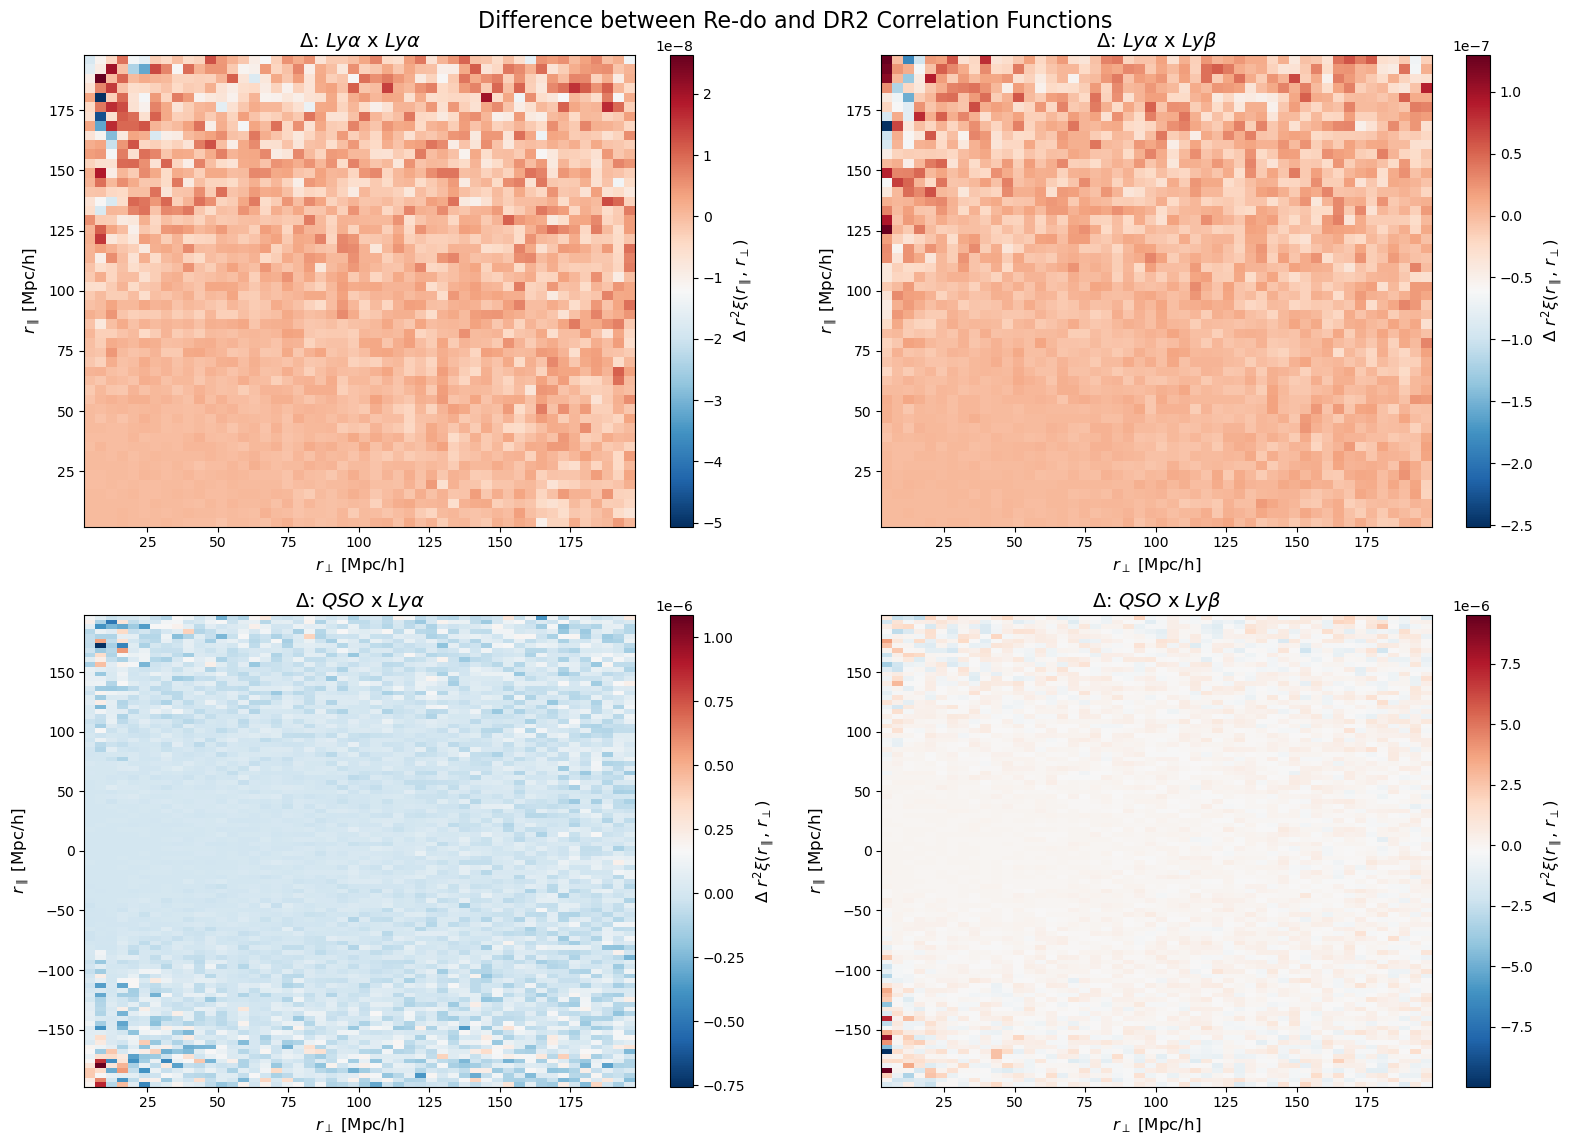

In [12]:
# Plots of the differences between Re-do and DR2 correlation functions

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Difference between Re-do and DR2 Correlation Functions\n', fontsize=16, y=0.95)

correlation_names = ['lyalya', 'lyalyb', 'qsolya', 'qsolyb']

for idx, name in enumerate(correlation_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Getting data from DR2 dictionaries
    corr_DR2 = correlation_data_DR2[name]['correlation']
    rp_DR2 = grid_coordinates_DR2[name]['rp']
    rt_DR2 = grid_coordinates_DR2[name]['rt']
    
    # Getting data from REDO dictionaries
    corr_redo = correlation_data_redo[name]['correlation']
    rp_redo = grid_coordinates_redo[name]['rp']
    rt_redo = grid_coordinates_redo[name]['rt']
    
    # Calculating the difference: Re-do - DR2

    difference = (rt_DR2**2 + rp_DR2**2) * (corr_redo - corr_DR2)
    
    # Use imshow with extent instead
    extent = [rt_DR2.min(), rt_DR2.max(), rp_DR2.min(), rp_DR2.max()]
    mesh = ax.imshow(difference, extent=extent, cmap='RdBu_r', 
                    aspect='auto', origin='lower')
    
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(r'$\Delta~ r^2\xi$($r_{\parallel}$, $r_{\perp}$)', fontsize=12)
    
    ax.set_xlabel('$r_{\perp}$ [Mpc/h]', fontsize=12)
    ax.set_ylabel('$r_{\parallel}$ [Mpc/h]', fontsize=12)
    
    titles = {
        'lyalya': r'$\Delta$: $Ly\alpha$ x $Ly\alpha$',
        'lyalyb': r'$\Delta$: $Ly\alpha$ x $Ly\beta$', 
        'qsolya': r'$\Delta$: $QSO$ x $Ly\alpha$',
        'qsolyb': r'$\Delta$: $QSO$ x $Ly\beta$'
    }
    ax.set_title(titles[name], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig(f'delta_corr-3-0-0.png')
plt.show()

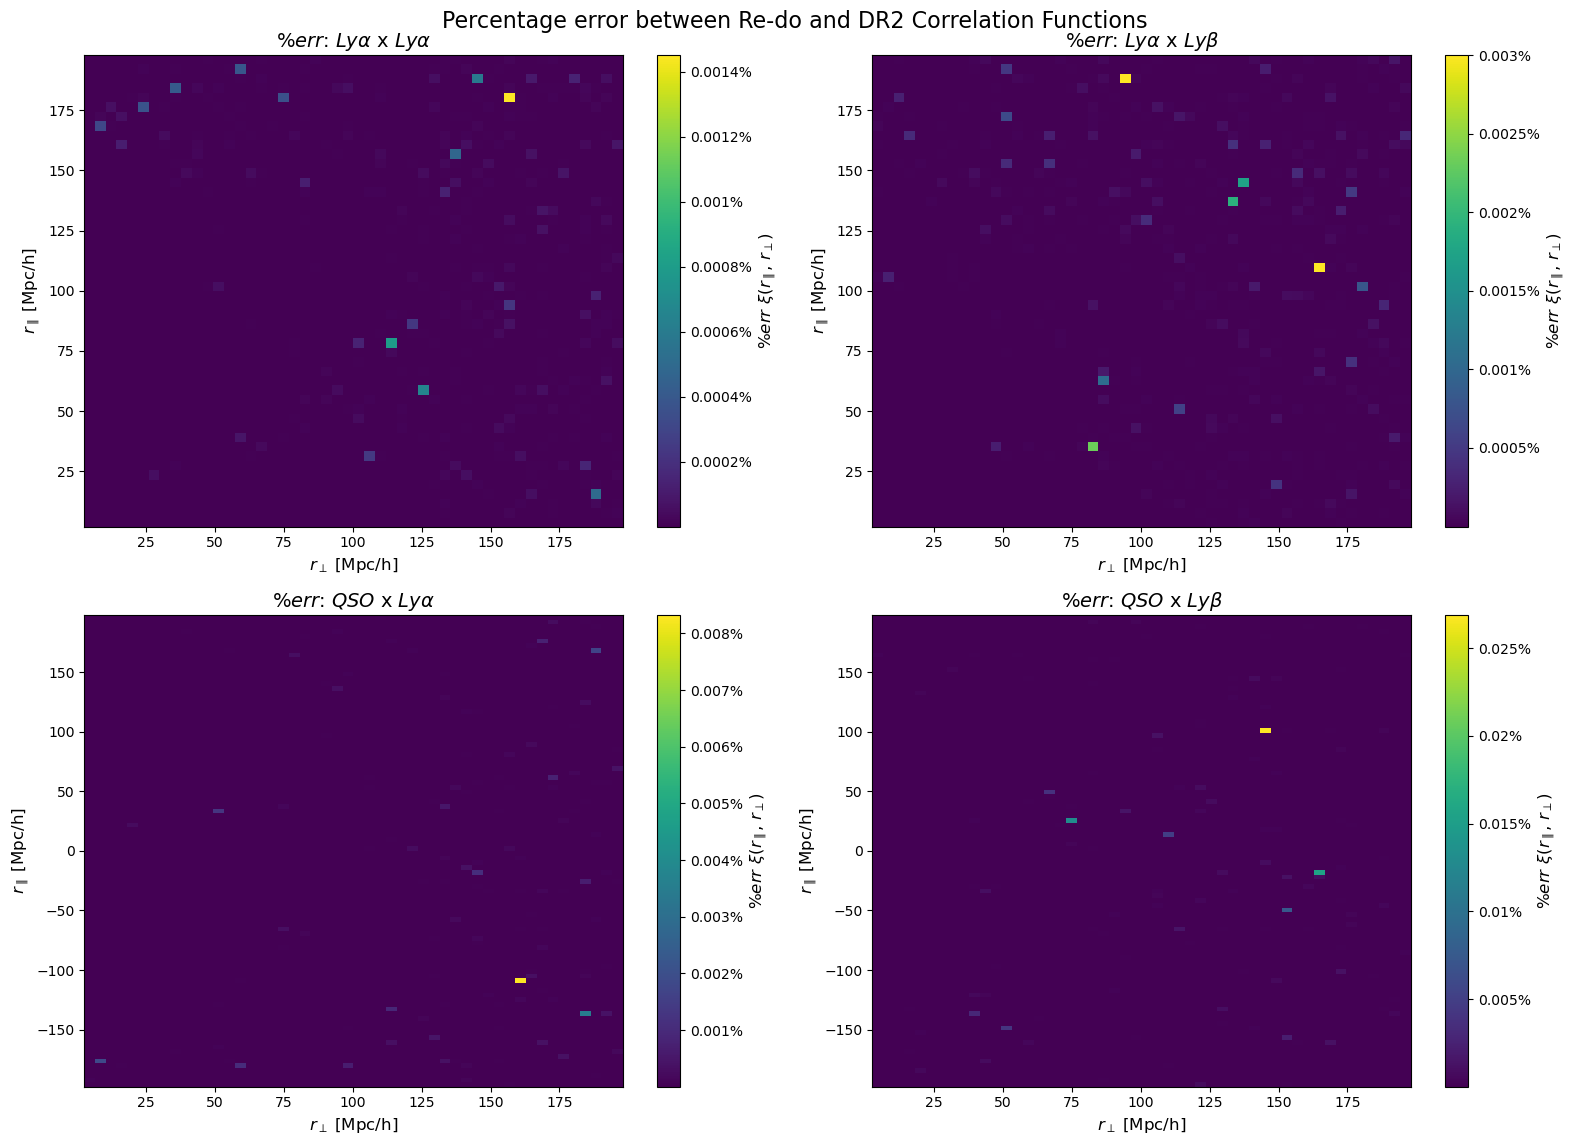

In [29]:
# Plots of the differences between Re-do and DR2 correlation functions

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Percentage error between Re-do and DR2 Correlation Functions\n', fontsize=16, y=0.95)

correlation_names = ['lyalya', 'lyalyb', 'qsolya', 'qsolyb']

for idx, name in enumerate(correlation_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Getting data from DR2 dictionaries
    corr_DR2 = correlation_data_DR2[name]['correlation']
    rp_DR2 = grid_coordinates_DR2[name]['rp']
    rt_DR2 = grid_coordinates_DR2[name]['rt']
    
    # Getting data from REDO dictionaries
    corr_redo = correlation_data_redo[name]['correlation']
    rp_redo = grid_coordinates_redo[name]['rp']
    rt_redo = grid_coordinates_redo[name]['rt']
    
    # Calculating the difference: Re-do - DR2

    percentage_error = (np.abs(corr_DR2 - corr_redo)/np.abs(corr_DR2)) * 100
    
    # Use imshow with extent instead
    extent = [rt_DR2.min(), rt_DR2.max(), rp_DR2.min(), rp_DR2.max()]
    mesh = ax.imshow(percentage_error, extent=extent, cmap='viridis', 
                    aspect='auto', origin='lower')
    
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(r'$\% err~ \xi$($r_{\parallel}$, $r_{\perp}$)', fontsize=12)

    # Formatter that preserves the number exactly and adds '%'
    def add_percent(x, pos):
        return f"{x:g}%"
    
    cbar.formatter = FuncFormatter(add_percent)
    cbar.update_ticks()
    
    ax.set_xlabel('$r_{\perp}$ [Mpc/h]', fontsize=12)
    ax.set_ylabel('$r_{\parallel}$ [Mpc/h]', fontsize=12)
    
    titles = {
        'lyalya': r'$\% err$: $Ly\alpha$ x $Ly\alpha$',
        'lyalyb': r'$\% err$: $Ly\alpha$ x $Ly\beta$', 
        'qsolya': r'$\% err$: $QSO$ x $Ly\alpha$',
        'qsolyb': r'$\% err$: $QSO$ x $Ly\beta$'
    }
    ax.set_title(titles[name], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig(f'percentage_error_corr-3-0-0.png')
plt.show()